4) Resolva as seguintes integrais pelo método da integração de monte carlo e pelo método da
integração por importância.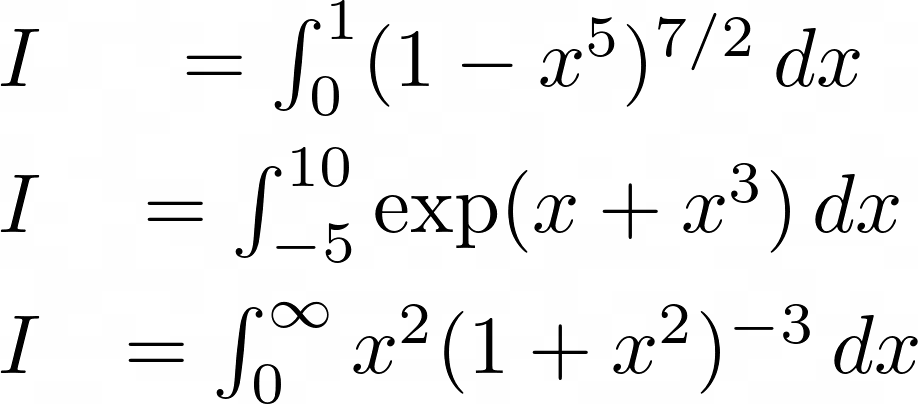

A) Resolvendo a primeira integral pelos métodos acima solicitados:

O Valor da integral a) é: 0.690005284974249


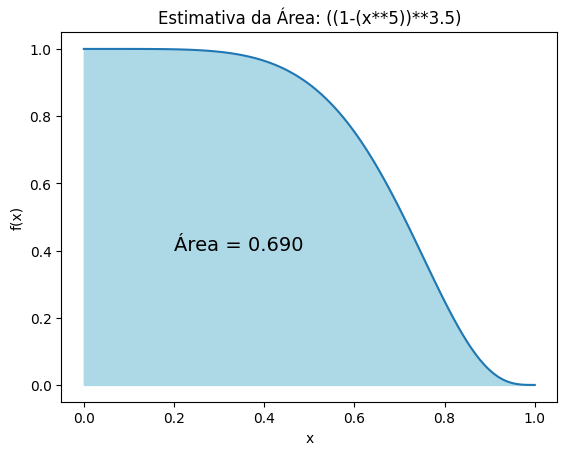

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras para o método de Monte Carlo
N = 100000

# Gerando N números aleatórios uniformemente distribuídos no intervalo [0, 1]
x = np.random.uniform(0, 1, N)

# Calculando a função para as amostras
y = ((1 - x ** 5) ** 3.5)

# Calculando a média dos valores
integral = np.mean(y)

# Imprime o valor da integral
print("O Valor da integral a) é:", integral)

# Criando os valores do eixo x para plotagem
x_values = np.linspace(0, 1, 100)

# Plotando a função
plt.plot(x_values, ((1 - (x_values ** 5)) ** 3.5))

# Preenchendo a área sob a curva
plt.fill_between(x_values, ((1 - (x_values ** 5)) ** 3.5), color='lightblue')

# Adicionando o rótulo com o valor da área
plt.text(0.2, 0.4, f'Área = {integral:.3f}', fontsize=14)

# Adicionando rótulos e título
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Estimativa da Área: ((1-(x**5))**3.5)')

# Mostrando o gráfico
plt.show()


B) A) Resolvendo a 2ª
integral pelos métodos acima solicitados:

<ipython-input-2-0faa86e8e6cc>:10: RuntimeWarning: overflow encountered in exp
  f = lambda x: np.exp(x + x**3)
<ipython-input-2-0faa86e8e6cc>:24: RuntimeWarning: overflow encountered in divide
  pesos = f(x_validos) / p[filtros]


Monte Carlo direto: I ≈ inf
Importância (Normal(1,3)): I ≈ inf


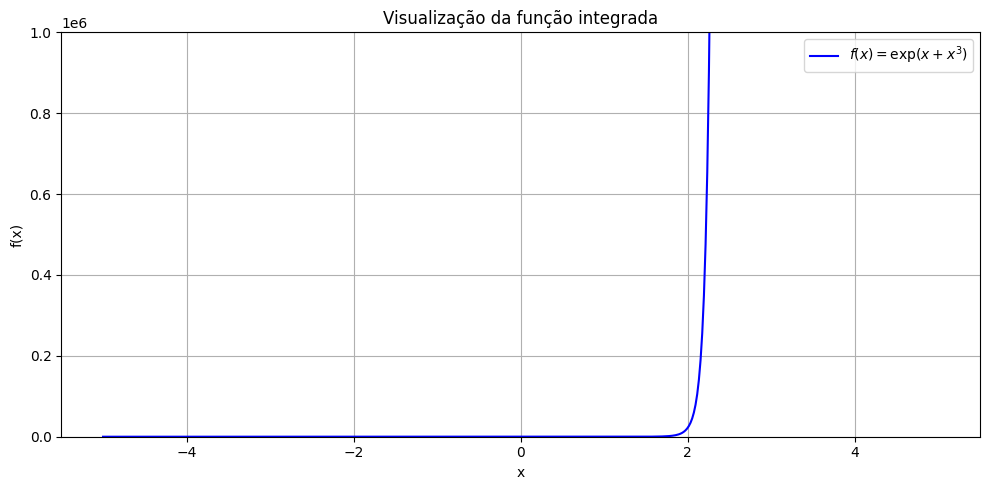

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Número de amostras
n = 100_000

# Intervalo da integral
a, b = -5, 10
f = lambda x: np.exp(x + x**3)

# --- Monte Carlo direto (uniforme em [-5, 10]) ---
x_uniforme = np.random.uniform(a, b, n)
I_mc = np.mean(f(x_uniforme)) * (b - a)
print(f"Monte Carlo direto: I ≈ {I_mc:.6e}")

# --- Importância (normal centrada em 1) ---
x_importancia = np.random.normal(loc=1, scale=3, size=n)
p = norm.pdf(x_importancia, loc=1, scale=3)

# Aplicar filtro de domínio válido
filtros = (x_importancia >= a) & (x_importancia <= b)
x_validos = x_importancia[filtros]
pesos = f(x_validos) / p[filtros]
I_is = np.mean(pesos)
print(f"Importância (Normal(1,3)): I ≈ {I_is:.6e}")

# --- Plot da função ---
x_plot = np.linspace(-5, 5, 500)
y_plot = f(x_plot)

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, color='blue', label=r'$f(x) = \exp(x + x^3)$')
plt.title("Visualização da função integrada")

# Adicionando rótulos e título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(0, 1e6)  # limite de visualização
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrando o gráfico
plt.show()


C) Resolvendo a 3ª integral pelos métodos acima solicitados:

Estimativa da integral I ≈ 0.196089


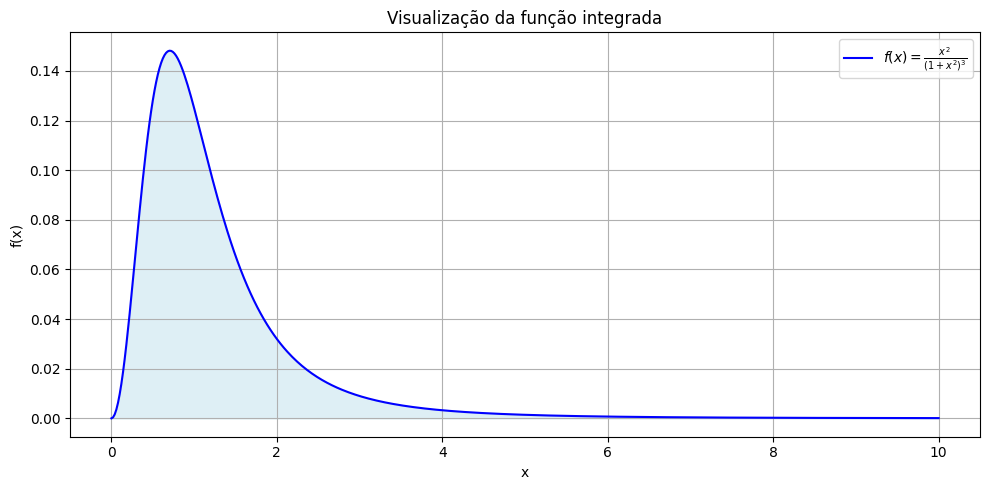

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras
N = 100_000

# Gerando amostras uniformes em [0, 1]
y = np.random.uniform(0, 1, N)

# Substituição: mapeia y ∈ (0,1) para x ∈ [0, ∞)
x = 1 / y - 1

# Função a ser integrada após substituição (corrigida com o Jacobiano |dx/dy| = 1/y^2)
z = (x ** 2) / (1 + x ** 2) ** 3 / y ** 2

# Estimativa da integral
integral = np.mean(z)
print(f"Estimativa da integral I ≈ {integral:.6f}")


# Plotando a função original para visualização
x_vals = np.linspace(0, 10, 500)
f_vals = (x_vals ** 2) / (1 + x_vals ** 2) ** 3

plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label=r'$f(x) = \frac{x^2}{(1 + x^2)^3}$', color='blue')
plt.fill_between(x_vals, f_vals, color='lightblue', alpha=0.4)
plt.title("Visualização da função integrada")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Parte 2- Usando O Método da Importância

a) Resolva as seguintes integrais pelo método da
integração por importância.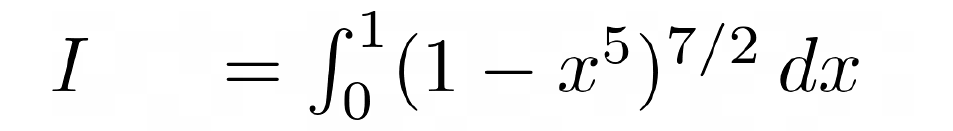

O valor da Integral a) por importância é = 2279908965331353.5000


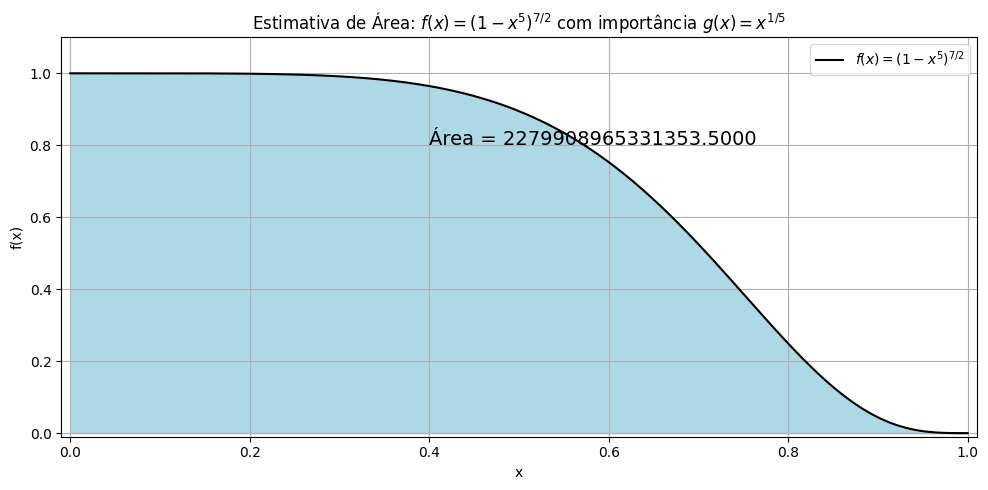

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras para o método de Monte Carlo
N = 100000

# Gerar N amostras uniformemente distribuídas no intervalo [0, 1]
y = np.random.uniform(0, 1, N)

# Substituição por importância: g(x) = x^(1/5) -> inversa: x = y^5
x_importancia = y ** 5

# Função original f(x) = (1 - x^5)^(7/2)
f_x = (1 - x_importancia ** 5) ** (7/2)

# Densidade da distribuição usada: p(x) = 5 * x^(4/5)
# Então 1/p(x) = 1 / (5 * x^(4/5))
p_x = 5 * x_importancia ** (4/5)

# Estimativa da integral com correção por importância
integral = np.mean(f_x / p_x)

# Imprimir o valor da integral
print(f'O valor da Integral a) por importância é = {integral:.4f}')

# --- Plot da função original para visualização ---
x = np.linspace(0, 1, 500)
curve_y = (1 - x ** 5) ** (7/2)

plt.figure(figsize=(10, 5))
plt.plot(x, curve_y, color='black', label=r'$f(x) = (1 - x^5)^{7/2}$')
plt.fill_between(x, curve_y, color='lightblue')
plt.text(0.4, 0.8, f'Área = {integral:.4f}', fontsize=14)

# Ajustes do gráfico
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Estimativa de Área: $f(x) = (1 - x^5)^{7/2}$ com importância $g(x) = x^{1/5}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


B) Resolva a seguinte integrais pelo método da integração por importância.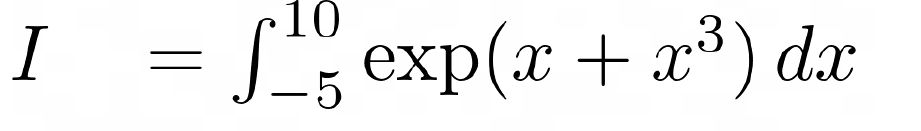

<ipython-input-9-20cb586b265b>:27: RuntimeWarning: overflow encountered in exp
  f_x = np.exp(x_filtrado + x_filtrado ** 3)
<ipython-input-9-20cb586b265b>:31: RuntimeWarning: overflow encountered in divide
  integral = np.mean(f_x / g_x)


O valor da Integral b) por importância é = inf


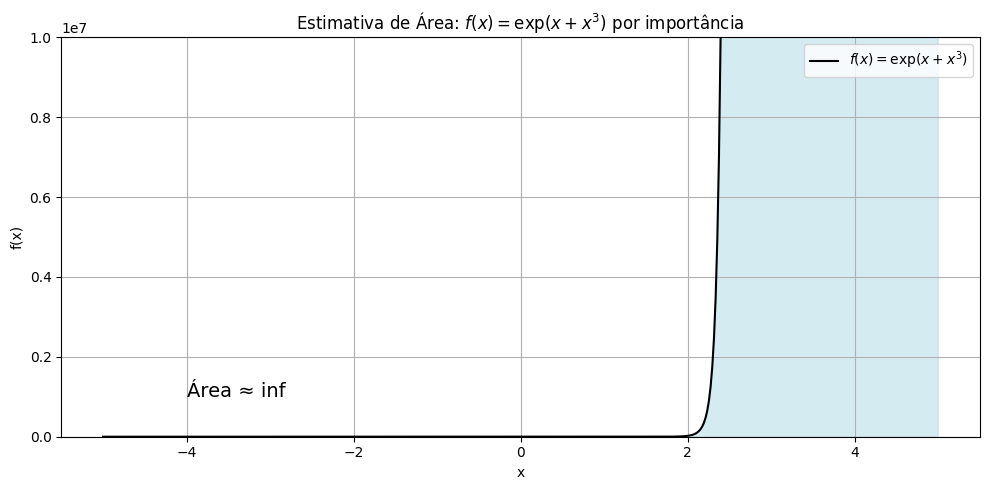

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras para o método de Monte Carlo
N = 1000000

# Gerar N amostras uniformes no intervalo [0, 1]
y = np.random.uniform(0, 1, N)

# Definindo os limites da nova integral: de -5 a 10
a, b = -5, 10

# Usar transformação inversa para importância com distribuição exponencial modificada
# Distribuição auxiliar: f(x) proporcional a exp(-(x-1)^2/9), centrada em x=1 com variância 9 (como uma Normal(1,3))
# Usar uma distribuição normal como g(x)
from scipy.stats import norm
g = lambda x: norm.pdf(x, loc=1, scale=3)

# Amostras de x com base na normal proposta
x = np.random.normal(loc=1, scale=3, size=N)

# Filtrar apenas os valores dentro do intervalo de integração [-5, 10]
filtro = (x >= a) & (x <= b)
x_filtrado = x[filtro]

# Função alvo f(x) = exp(x + x^3)
f_x = np.exp(x_filtrado + x_filtrado ** 3)
g_x = g(x_filtrado)

# Estimativa da integral por importância
integral = np.mean(f_x / g_x)

# Imprimir o valor da integral
print(f'O valor da Integral b) por importância é = {integral:.4e}')

# --- Gráfico da função integrada ---
x_vals = np.linspace(-5, 5, 500)
y_vals = np.exp(x_vals + x_vals ** 3)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, color='black', label=r'$f(x) = \exp(x + x^3)$')
plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)
plt.text(-4, 1e6, f'Área ≈ {integral:.4e}', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Estimativa de Área: $f(x) = \exp(x + x^3)$ por importância')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1e7)
plt.show()


C) Resolva a seguinte integrais pelo método da integração por importância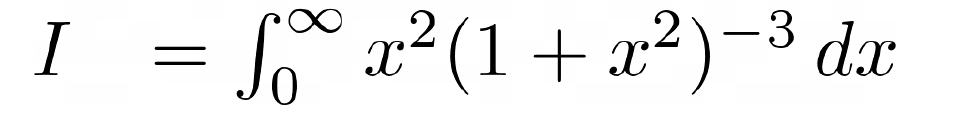

Valor estimado da integral c): I ≈ 0.197587


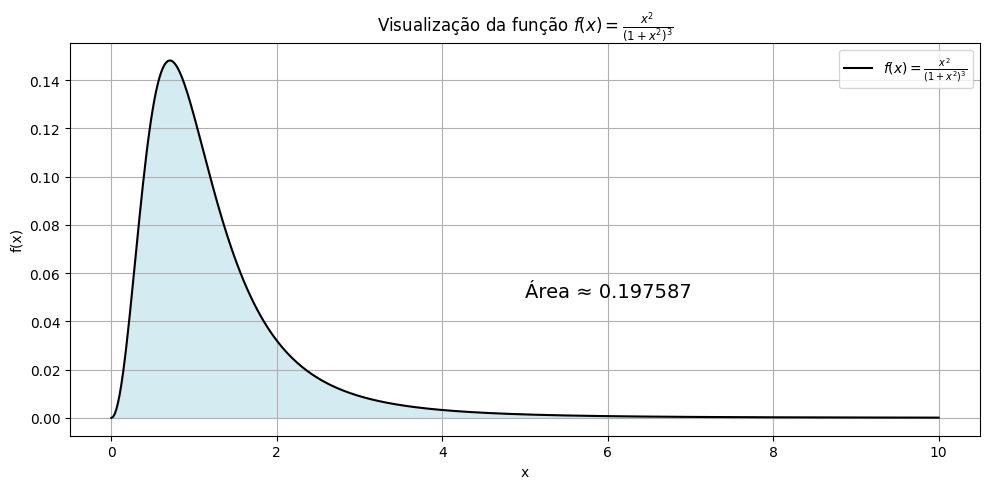

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras para o método de Monte Carlo
N = 100000

# Gerar amostras uniformes em [0, 1]
y = np.random.uniform(0, 1, N)

# Substituição para transformar [0,1] em [0,∞): x = (1 - y)/y
x = (1 - y) / y

# Jacobiano da transformação: dx/dy = 1 / y^2
jacobiano = 1 / (y ** 2)

# Função da integral: f(x) = x^2 / (1 + x^2)^3
f_x = (x ** 2) / (1 + x ** 2) ** 3

# Valor estimado da integral com Monte Carlo usando mudança de variável
integral = np.mean(f_x * jacobiano)

# Imprimir o valor estimado
print(f"Valor estimado da integral c): I ≈ {integral:.6f}")

# Plotar a função original
x_vals = np.linspace(0, 10, 500)
y_vals = (x_vals ** 2) / (1 + x_vals ** 2) ** 3

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = \frac{x^2}{(1 + x^2)^3}$', color='black')
plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)
plt.title("Visualização da função $f(x) = \\frac{x^2}{(1 + x^2)^3}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.text(5, 0.05, f'Área ≈ {integral:.6f}', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
